In [ ]:

import pandas as pd
import gc
import os

from google.colab import drive
drive.mount('/content/drive')


os.chdir('/content/drive/MyDrive/신용카드고객')

train_df1_splits = ["train", "test"]


train_df1_categories = {
    "회원정보": {"folder": "1.회원정보", "suffix": "회원정보", "var_prefix": "customer"},
    "신용정보": {"folder": "2.신용정보", "suffix": "신용정보", "var_prefix": "credit"},
    "승인매출정보": {"folder": "3.승인매출정보", "suffix": "승인매출정보", "var_prefix": "sales"},
    "청구정보": {"folder": "4.청구입금정보", "suffix": "청구정보", "var_prefix": "billing"},
    "잔액정보": {"folder": "5.잔액정보", "suffix": "잔액정보", "var_prefix": "balance"},
    "채널정보": {"folder": "6.채널정보", "suffix": "채널정보", "var_prefix": "channel"},
    "마케팅정보": {"folder": "7.마케팅정보", "suffix": "마케팅정보", "var_prefix": "marketing"},
    "성과정보": {"folder": "8.성과정보", "suffix": "성과정보", "var_prefix": "performance"}
}
months = ['07', '08', '09', '10', '11', '12']

for split in train_df1_splits:
    for category, info in train_df1_categories.items():
        folder = info["folder"]
        suffix = info["suffix"]
        var_prefix = info["var_prefix"]

        for month in months:
            # 파일명 형식: 2018{month}_{split}_{suffix}.parquet
            file_path = f"./{split}/{folder}/2018{month}_{split}_{suffix}.parquet"
            # 변수명 형식: {var_prefix}_{split}_{month}
            variable_name = f"{var_prefix}_{split}_{month}"
            globals()[variable_name] = pd.read_parquet(file_path)
            print(f"{variable_name} is loaded from {file_path}")

gc.collect()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
customer_train_07 is loaded from ./train/1.회원정보/201807_train_회원정보.parquet
customer_train_08 is loaded from ./train/1.회원정보/201808_train_회원정보.parquet
customer_train_09 is loaded from ./train/1.회원정보/201809_train_회원정보.parquet
customer_train_10 is loaded from ./train/1.회원정보/201810_train_회원정보.parquet
customer_train_11 is loaded from ./train/1.회원정보/201811_train_회원정보.parquet
customer_train_12 is loaded from ./train/1.회원정보/201812_train_회원정보.parquet
credit_train_07 is loaded from ./train/2.신용정보/201807_train_신용정보.parquet
credit_train_08 is loaded from ./train/2.신용정보/201808_train_신용정보.parquet
credit_train_09 is loaded from ./train/2.신용정보/201809_train_신용정보.parquet
credit_train_10 is loaded from ./train/2.신용정보/201810_train_신용정보.parquet
credit_train_11 is loaded from ./train/2.신용정보/201811_train_신용정보.parquet
credit_train_12 is loaded from ./train/2.신용정보/201812_train_신용정보.par

0

In [ ]:
# 데이터 유형별 설정
info_categories = ["customer", "credit", "sales", "billing", "balance", "channel", "marketing", "performance"]

# 월 설정
months = ['07', '08', '09', '10', '11', '12']

In [ ]:
#### Train ####

# 각 유형별로 월별 데이터를 합쳐서 새로운 변수에 저장
train_dfs = {}

for prefix in info_categories:
    # globals()에서 동적 변수명으로 데이터프레임들을 가져와 리스트에 저장
    df_list = [globals()[f"{prefix}_train_{month}"] for month in months]
    train_dfs[f"{prefix}_train_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_train_df is created with shape: {train_dfs[f'{prefix}_train_df'].shape}")


customer_train_df = train_dfs["customer_train_df"]
credit_train_df   = train_dfs["credit_train_df"]
sales_train_df    = train_dfs["sales_train_df"]
billing_train_df  = train_dfs["billing_train_df"]
balance_train_df  = train_dfs["balance_train_df"]
channel_train_df  = train_dfs["channel_train_df"]
marketing_train_df= train_dfs["marketing_train_df"]
performance_train_df = train_dfs["performance_train_df"]

gc.collect()

customer_train_df is created with shape: (2400000, 78)
credit_train_df is created with shape: (2400000, 42)
sales_train_df is created with shape: (2400000, 406)
billing_train_df is created with shape: (2400000, 46)
balance_train_df is created with shape: (2400000, 82)
channel_train_df is created with shape: (2400000, 105)
marketing_train_df is created with shape: (2400000, 64)
performance_train_df is created with shape: (2400000, 49)


0

In [ ]:
#### Test ####

# test 데이터에 대해 train과 동일한 방법 적용
test_dfs = {}

for prefix in info_categories:
    df_list = [globals()[f"{prefix}_test_{month}"] for month in months]
    test_dfs[f"{prefix}_test_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_test_df is created with shape: {test_dfs[f'{prefix}_test_df'].shape}")


customer_test_df = test_dfs["customer_test_df"]
credit_test_df   = test_dfs["credit_test_df"]
sales_test_df    = test_dfs["sales_test_df"]
billing_test_df  = test_dfs["billing_test_df"]
balance_test_df  = test_dfs["balance_test_df"]
channel_test_df  = test_dfs["channel_test_df"]
marketing_test_df= test_dfs["marketing_test_df"]
performance_test_df = test_dfs["performance_test_df"]

gc.collect()

customer_test_df is created with shape: (600000, 77)
credit_test_df is created with shape: (600000, 42)
sales_test_df is created with shape: (600000, 406)
billing_test_df is created with shape: (600000, 46)
balance_test_df is created with shape: (600000, 82)
channel_test_df is created with shape: (600000, 105)
marketing_test_df is created with shape: (600000, 64)
performance_test_df is created with shape: (600000, 49)


0

In [ ]:
#### Train ####

train_df = customer_train_df.merge(credit_train_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: train_step1, shape:", train_df.shape)
del customer_train_df, credit_train_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_train_df",    "Step2"),
    ("billing_train_df",  "Step3"),
    ("balance_train_df",  "Step4"),
    ("channel_train_df",  "Step5"),
    ("marketing_train_df","Step6"),
    ("performance_train_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    train_df = train_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: train_{step}, shape:", train_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: train_step1, shape: (2400000, 118)
Step2 저장 완료: train_Step2, shape: (2400000, 522)
Step3 저장 완료: train_Step3, shape: (2400000, 566)
Step4 저장 완료: train_Step4, shape: (2400000, 646)
Step5 저장 완료: train_Step5, shape: (2400000, 749)
Step6 저장 완료: train_Step6, shape: (2400000, 811)
최종 저장 완료: train_최종, shape: (2400000, 858)


In [ ]:
#### Test ####

test_df = customer_test_df.merge(credit_test_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: test_step1, shape:", test_df.shape)
del customer_test_df, credit_test_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_test_df",    "Step2"),
    ("billing_test_df",  "Step3"),
    ("balance_test_df",  "Step4"),
    ("channel_test_df",  "Step5"),
    ("marketing_test_df","Step6"),
    ("performance_test_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    test_df = test_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: test_{step}, shape:", test_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: test_step1, shape: (600000, 117)
Step2 저장 완료: test_Step2, shape: (600000, 521)
Step3 저장 완료: test_Step3, shape: (600000, 565)
Step4 저장 완료: test_Step4, shape: (600000, 645)
Step5 저장 완료: test_Step5, shape: (600000, 748)
Step6 저장 완료: test_Step6, shape: (600000, 810)
최종 저장 완료: test_최종, shape: (600000, 857)


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import gc
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/train_df.csv')
test_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/test_df.csv')

Mounted at /content/drive


<ipython-input-3-accc53ad18a1>:3: DtypeWarning: Columns (300,385) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/train_df.csv')
<ipython-input-3-accc53ad18a1>:4: DtypeWarning: Columns (299) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/test_df.csv')


In [ ]:
train_df

,Unnamed: 0,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,0,201807,TRAIN_000000,2,40대,D,1,1,0,1,...,0.999998,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543
1,1,201807,TRAIN_000001,1,30대,E,1,1,1,1,...,1.092698,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000
2,2,201807,TRAIN_000002,1,30대,C,1,1,0,1,...,1.006124,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420
3,3,201807,TRAIN_000003,2,40대,D,1,1,0,1,...,0.999998,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124
4,4,201807,TRAIN_000004,2,40대,E,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,2399995,201812,TRAIN_399995,2,70대이상,E,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN
2399996,2399996,201812,TRAIN_399996,2,50대,D,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815
2399997,2399997,201812,TRAIN_399997,1,30대,C,1,1,0,1,...,0.999998,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000
2399998,2399998,201812,TRAIN_399998,1,40대,E,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
import pandas as pd
total_rows = 2400000

# 1. 결측치 개수 계산
missing_counts = train_df.isnull().sum()

# 2. 결측치 비율 계산 (%)
missing_ratios = (missing_counts / total_rows) * 100

# 3. 결측치가 있는 변수만 필터링
missing_train_df = pd.DataFrame({
    '결측치 개수': missing_counts,
    '결측 비율 (%)': missing_ratios
})
missing_train_df = missing_train_df[missing_train_df['결측치 개수'] > 0]  # 결측치가 0인 변수 제외

# 4. 결과 정렬 (결측 비율 높은 순)
missing_train_df = missing_train_df.sort_values(by='결측 비율 (%)', ascending=False)

# 5. 출력
print(f"총 데이터 수: {total_rows}")
print("\n결측치가 있는 변수 목록:")
print(missing_train_df)


총 데이터 수: 2400000

결측치가 있는 변수 목록:
                 결측치 개수  결측 비율 (%)
연체일자_B0M        2394336  99.764000
_3순위여유업종        2377725  99.071875
_3순위납부업종        2310187  96.257792
_2순위여유업종        2302286  95.928583
_3순위교통업종        2045455  85.227292
_2순위납부업종        2033640  84.735000
최종카드론_대출일자      1988330  82.847083
_1순위여유업종        1987260  82.802500
최종카드론_신청경로코드    1958226  81.592750
최종카드론_금융상환방식코드  1958126  81.588583
RV신청일자          1951236  81.301500
_2순위교통업종        1656423  69.017625
OS구분코드          1633566  68.065250
_3순위쇼핑업종        1312267  54.677792
_1순위납부업종        1216263  50.677625
_1순위교통업종        1164494  48.520583
_2순위쇼핑업종        1135042  47.293417
_3순위업종          1107898  46.162417
_2순위신용체크구분       958115  39.921458
_1순위쇼핑업종         922663  38.444292
_2순위업종           912725  38.030208
혜택수혜율_B0M        555522  23.146750
_1순위업종           539992  22.499667
최종유효년월_신용_이용     534231  22.259625
혜택수혜율_R3M        488746  20.364417
가입통신회사코드         387570  16.148750
직장시도명            24496

In [ ]:
train_df1=train_df.copy()

In [ ]:
high_missing_cols = missing_ratios[missing_ratios >= 50].index.tolist()

train_df1 = train_df1.drop(columns=high_missing_cols)

In [ ]:
missing_bleow_20 = missing_train_df[(missing_ratios >= 1) & (missing_ratios <= 20)]
train_df1[missing_bleow_20.index]

<ipython-input-32-d0e281ae7f07>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_bleow_20 = missing_train_df[(missing_ratios >= 1) & (missing_ratios <= 20)]


,가입통신회사코드,직장시도명,최종유효년월_신용_이용가능,최종카드발급일자,RV전환가능여부,_1순위신용체크구분
0,L사,서울,202110.0,20160912.0,N,신용
1,K사,경기,202112.0,20170122.0,Z,신용
2,S사,서울,202111.0,20161113.0,N,신용
3,L사,부산,202201.0,20170205.0,N,신용
4,K사,광주,202201.0,20170409.0,Z,신용
...,...,...,...,...,...,...
2399995,S사,울산,202110.0,20150902.0,Z,신용
2399996,L사,인천,202110.0,20161201.0,Z,신용
2399997,S사,서울,202110.0,20170609.0,N,신용
2399998,S사,부산,202202.0,20160928.0,Z,신용


In [ ]:
import numpy as np
#1. 가입통신회사코드
train_df1['가입통신회사코드'] = np.where(
    (train_df1['회원여부_이용가능'] == 'N') | (train_df1['이용금액_R3M_신용'] == 0),
    '미가입',
    train_df1['가입통신회사코드'].fillna('Unknown')
)

# 2. 직장시도명
train_df1['직장시도명'] = np.where(
    train_df1['직장시도명'].isna() & train_df1['거주시도명'].notna(),
    train_df1['거주시도명'],
    train_df1['직장시도명'].fillna('Unknown')
)

# 3. RV전환가능여부
train_df1['RV전환가능여부'] = np.where(
    (train_df1['이용금액_R3M_신용'] == 0) | (train_df1['소지여부_신용'] == 'N'),
    'N',
    train_df1['RV전환가능여부'].fillna('Unknown')
)

# 4. _1순위신용체크구분
train_df1['_1순위신용체크구분'] = np.where(
    train_df1['이용금액_R3M_신용'] == 0,
    '미사용',
    np.where(
        train_df1['_1순위신용체크구분'].isna() & train_df1['_1순위업종'].notna(),
        '신용',  # 업종 있으면 신용카드 사용 추정
        train_df1['_1순위신용체크구분'].fillna('Unknown')
    )
)

In [ ]:
print(train_df1[['혜택수혜율_B0M', '혜택수혜율_R3M']].dropna().corr())

           혜택수혜율_B0M  혜택수혜율_R3M
혜택수혜율_B0M   1.000000   0.936912
혜택수혜율_R3M   0.936912   1.000000


In [ ]:

train_df1['혜택수혜율_B0M'] = np.where(
    train_df1['혜택수혜율_B0M'].isna() & train_df1['혜택수혜율_R3M'].notna(),
    train_df1['혜택수혜율_R3M'],
    train_df1['혜택수혜율_B0M']
)
train_df1['혜택수혜율_B0M'] = train_df1['혜택수혜율_B0M'].fillna(0)

# 2. 혜택수혜율_R3M 결측치 처리
# B0M 값이 있으면 B0M으로 대체, 둘 다 없으면 0
train_df1['혜택수혜율_R3M'] = np.where(
    train_df1['혜택수혜율_R3M'].isna() & train_df1['혜택수혜율_B0M'].notna(),
    train_df1['혜택수혜율_B0M'],
    train_df1['혜택수혜율_R3M']
)
train_df1['혜택수혜율_R3M'] = train_df1['혜택수혜율_R3M'].fillna(0)

# 도메인 반영: 소지여부_신용이 'N'이면 둘 다 0으로 설정
train_df1.loc[(train_df1['소지여부_신용'] == 'N') | (train_df1['이용금액_R3M_신용'] == 0), ['혜택수혜율_B0M', '혜택수혜율_R3M']] = 0

In [ ]:
train_df1[['혜택수혜율_B0M', '혜택수혜율_R3M']]

,혜택수혜율_B0M,혜택수혜율_R3M
0,1.280543,1.044401
1,0.000000,0.000000
2,1.208420,0.524159
3,1.657124,0.880925
4,0.000000,0.000000
...,...,...
2399995,0.000000,0.000000
2399996,2.533815,1.377071
2399997,0.000000,0.000000
2399998,0.000000,0.000000


In [ ]:
train_df1[['_1순위교통업종','_2순위쇼핑업종','_3순위업종','_2순위신용체크구분','_1순위쇼핑업종','_2순위업종','_1순위업종']]

,_1순위교통업종,_2순위쇼핑업종,_3순위업종,_2순위신용체크구분,_1순위쇼핑업종,_2순위업종,_1순위업종
0,택시,NaN,사교활동,체크,쇼핑기타,쇼핑,납부
1,주유,슈퍼마켓,교통,NaN,도소매,납부,쇼핑
2,주유,도소매,교통,체크,온라인,사교활동,쇼핑
3,택시,슈퍼마켓,사교활동,체크,마트,납부,쇼핑
4,NaN,NaN,NaN,체크,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2399995,NaN,NaN,NaN,체크,NaN,NaN,NaN
2399996,버스지하철,슈퍼마켓,사교활동,NaN,도소매,의료,쇼핑
2399997,주유,슈퍼마켓,교통,NaN,온라인,사교활동,쇼핑
2399998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def fill_missing_20_50(df, target_col, usage_col='이용금액_R3M_신용', related_col=None):
    if related_col:
        return np.where(
            df[usage_col] == 0, '미사용',
            np.where(
                df[target_col].isna() & df[related_col].notna(), df[related_col],
                df[target_col].fillna('Unknown')
            )
        )
    return np.where(df[usage_col] == 0, '미사용', df[target_col].fillna('Unknown'))

# 변수별 처리
train_df1['_1순위교통업종'] = fill_missing_20_50(train_df1, '_1순위교통업종', related_col='_1순위업종')
train_df1['_2순위쇼핑업종'] = fill_missing_20_50(train_df1, '_2순위쇼핑업종', related_col='_1순위쇼핑업종')
train_df1['_3순위업종'] = fill_missing_20_50(train_df1, '_3순위업종', related_col='_2순위업종')
train_df1['_2순위신용체크구분'] = fill_missing_20_50(train_df1, '_2순위신용체크구분', related_col='_1순위신용체크구분')
train_df1['_1순위쇼핑업종'] = fill_missing_20_50(train_df1, '_1순위쇼핑업종', related_col='_1순위업종')
train_df1['_2순위업종'] = fill_missing_20_50(train_df1, '_2순위업종', related_col='_1순위업종')
train_df1['_1순위업종'] = fill_missing_20_50(train_df1, '_1순위업종')

In [ ]:
train_df1[['_1순위교통업종','_2순위쇼핑업종','_3순위업종','_2순위신용체크구분','_1순위쇼핑업종','_2순위업종','_1순위업종']]

,_1순위교통업종,_2순위쇼핑업종,_3순위업종,_2순위신용체크구분,_1순위쇼핑업종,_2순위업종,_1순위업종
0,택시,쇼핑기타,사교활동,체크,쇼핑기타,쇼핑,납부
1,주유,슈퍼마켓,교통,신용,도소매,납부,쇼핑
2,주유,도소매,교통,체크,온라인,사교활동,쇼핑
3,택시,슈퍼마켓,사교활동,체크,마트,납부,쇼핑
4,미사용,미사용,미사용,미사용,미사용,미사용,미사용
...,...,...,...,...,...,...,...
2399995,Unknown,Unknown,Unknown,체크,Unknown,Unknown,Unknown
2399996,버스지하철,슈퍼마켓,사교활동,신용,도소매,의료,쇼핑
2399997,주유,슈퍼마켓,교통,신용,온라인,사교활동,쇼핑
2399998,미사용,미사용,미사용,미사용,미사용,미사용,미사용


In [ ]:

total_rows = 2400000

# 1. 결측치 개수 계산
missing_counts = train_df1.isnull().sum()

# 2. 결측치 비율 계산 (%)
missing_ratios = (missing_counts / total_rows) * 100

# 3. 결측치가 있는 변수만 필터링
missing_train_df1 = pd.DataFrame({
    '결측치 개수': missing_counts,
    '결측 비율 (%)': missing_ratios
})
missing_train_df1 = missing_train_df1[missing_train_df1['결측치 개수'] > 0]  # 결측치가 0인 변수 제외

# 4. 결과 정렬 (결측 비율 높은 순)
missing_train_df1 = missing_train_df1.sort_values(by='결측 비율 (%)', ascending=False)

# 5. 출력
print(f"총 데이터 수: {total_rows}")
print("\n결측치가 있는 변수 목록:")
print(missing_train_df1)


총 데이터 수: 2400000

결측치가 있는 변수 목록:
                결측치 개수  결측 비율 (%)
최종유효년월_신용_이용    534231  22.259625
최종유효년월_신용_이용가능  210447   8.768625
최종카드발급일자         41965   1.748542


In [ ]:
####Test 전처리####

test_df1=test_df.copy()
test_df1=test_df1.drop(columns=high_missing_cols)

import numpy as np

# 1. 가입통신회사코드
test_df1['가입통신회사코드'] = np.where(
    (test_df1['회원여부_이용가능'] == 'N') | (test_df1['이용금액_R3M_신용'] == 0),
    '미가입',
    test_df1['가입통신회사코드'].fillna('Unknown')
)

# 2. 직장시도명
test_df1['직장시도명'] = np.where(
    test_df1['직장시도명'].isna() & test_df1['거주시도명'].notna(),
    test_df1['거주시도명'],
    test_df1['직장시도명'].fillna('Unknown')
)

# 3. RV전환가능여부
test_df1['RV전환가능여부'] = np.where(
    (test_df1['이용금액_R3M_신용'] == 0) | (test_df1['소지여부_신용'] == 'N'),
    'N',
    test_df1['RV전환가능여부'].fillna('Unknown')
)

# 4. _1순위신용체크구분
test_df1['_1순위신용체크구분'] = np.where(
    test_df1['이용금액_R3M_신용'] == 0,
    '미사용',
    np.where(
        test_df1['_1순위신용체크구분'].isna() & test_df1['_1순위업종'].notna(),
        '신용',  # 업종 있으면 신용카드 사용 추정
        test_df1['_1순위신용체크구분'].fillna('Unknown')
    )
)

test_df1['혜택수혜율_B0M'] = np.where(
    test_df1['혜택수혜율_B0M'].isna() & test_df1['혜택수혜율_R3M'].notna(),
    test_df1['혜택수혜율_R3M'],
    test_df1['혜택수혜율_B0M']
)
test_df1['혜택수혜율_B0M'] = test_df1['혜택수혜율_B0M'].fillna(0)

# 2. 혜택수혜율_R3M 결측치 처리
# B0M 값이 있으면 B0M으로 대체, 둘 다 없으면 0
test_df1['혜택수혜율_R3M'] = np.where(
    test_df1['혜택수혜율_R3M'].isna() & test_df1['혜택수혜율_B0M'].notna(),
    test_df1['혜택수혜율_B0M'],
    test_df1['혜택수혜율_R3M']
)
test_df1['혜택수혜율_R3M'] = test_df1['혜택수혜율_R3M'].fillna(0)

# 도메인 반영: 소지여부_신용이 'N'이면 둘 다 0으로 설정
test_df1.loc[(test_df1['소지여부_신용'] == 'N') | (test_df1['이용금액_R3M_신용'] == 0), ['혜택수혜율_B0M', '혜택수혜율_R3M']] = 0

def fill_missing_20_50(df, target_col, usage_col='이용금액_R3M_신용', related_col=None):
    if related_col:
        return np.where(
            df[usage_col] == 0, '미사용',
            np.where(
                df[target_col].isna() & df[related_col].notna(), df[related_col],
                df[target_col].fillna('Unknown')
            )
        )
    return np.where(df[usage_col] == 0, '미사용', df[target_col].fillna('Unknown'))

# 변수별 처리
test_df1['_1순위교통업종'] = fill_missing_20_50(test_df1, '_1순위교통업종', related_col='_1순위업종')
test_df1['_2순위쇼핑업종'] = fill_missing_20_50(test_df1, '_2순위쇼핑업종', related_col='_1순위쇼핑업종')
test_df1['_3순위업종'] = fill_missing_20_50(test_df1, '_3순위업종', related_col='_2순위업종')
test_df1['_2순위신용체크구분'] = fill_missing_20_50(test_df1, '_2순위신용체크구분', related_col='_1순위신용체크구분')
test_df1['_1순위쇼핑업종'] = fill_missing_20_50(test_df1, '_1순위쇼핑업종', related_col='_1순위업종')
test_df1['_2순위업종'] = fill_missing_20_50(test_df1, '_2순위업종', related_col='_1순위업종')
test_df1['_1순위업종'] = fill_missing_20_50(test_df1, '_1순위업종')


In [ ]:
feature_cols = [col for col in train_df1.columns if col not in ["ID", "Segment"]]

X = train_df1[feature_cols].copy()
y = train_df1["Segment"].copy()

# 타깃 라벨 인코딩
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

X_test = test_df1.copy()

encoders = {}  # 각 컬럼별 encoder 저장

for col in categorical_features:
    le_train = LabelEncoder()
    X[col] = le_train.fit_transform(X[col])
    encoders[col] = le_train
    unseen_labels_val = set(X_test[col]) - set(le_train.classes_)
    if unseen_labels_val:
        le_train.classes_ = np.append(le_train.classes_, list(unseen_labels_val))
    X_test[col] = le_train.transform(X_test[col])
gc.collect()

15081

In [ ]:
model = xgb.XGBClassifier(random_state=42)
model.fit(X, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
X_test.drop(columns=['ID'],inplace=True)

In [ ]:
# row-level 예측 수행
y_test_pred = model.predict(X_test)
# 예측 결과를 변환
y_test_pred_labels = le_target.inverse_transform(y_test_pred)

# row 단위 예측 결과를 test_data에 추가
test_data = test_df.copy()  # 원본 유지
test_data["pred_label"] = y_test_pred_labels

In [ ]:
submission = test_data.groupby("ID")["pred_label"] \
    .agg(lambda x: x.value_counts().idxmax()) \
    .reset_index()

submission.columns = ["ID", "Segment"]
submission.to_csv('./base_submit.csv',index=False)

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64


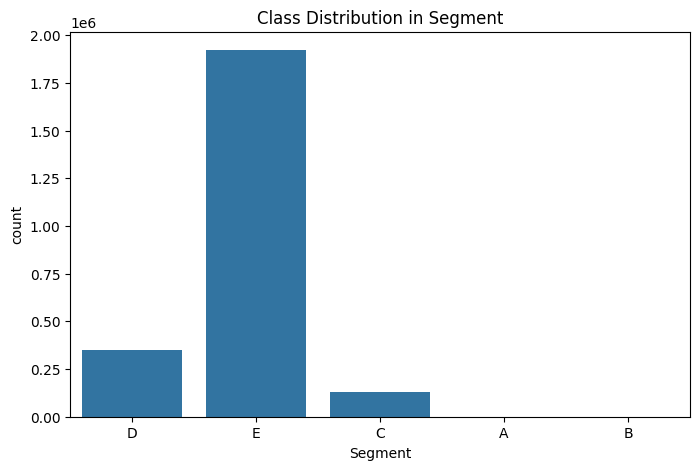

In [ ]:
# Segment 컬럼의 클래스 분포 확인
print(train_df["Segment"].value_counts())

# 시각화로 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=train_df["Segment"])
plt.title("Class Distribution in Segment")
plt.show()

